In [1]:
import pandas as pd

## Loading Dataset

In [2]:
df = pd.read_csv('Crimes_2001_to_Present_2024.csv')

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155740 entries, 0 to 8155739
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
df.drop(columns=['Block','Beat','Ward','District','X Coordinate','Y Coordinate', 'Community Area','Latitude','Longitude'], inplace=True)

In [6]:
df.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Year,Updated On,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,0560,ASSAULT,SIMPLE,OTHER,False,False,08A,2007,08/17/2015 03:03:40 PM,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,01A,2021,11/18/2023 03:39:49 PM,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,01A,2021,11/18/2023 03:39:49 PM,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,05,2023,11/18/2023 03:39:49 PM,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,08B,2023,12/09/2023 03:41:24 PM,"(41.737750767, -87.604855911)"


### Missing values

In [7]:
df.isnull().sum()

ID                          0
Case Number                 0
Date                        0
IUCR                        0
Primary Type                0
Description                 0
Location Description    13548
Arrest                      0
Domestic                    0
FBI Code                    0
Year                        0
Updated On                  0
Location                89845
dtype: int64

In [8]:
#Handling Missing Values
df['Location Description'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)

## EDA

In [9]:
df.describe(include='all')

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Year,Updated On,Location
count,8.155740e+06,8155740,8155740,8155740,8155740,8155740,8155740,8155740,8155740,8155740,8.155740e+06,8155740,8155740
unique,NaN,8155163,3385794,415,36,563,219,2,2,27,NaN,6503,901770
top,NaN,HZ140230,01/01/2008 12:01:00 AM,0820,THEFT,SIMPLE,STREET,False,False,06,NaN,02/10/2018 03:50:01 PM,Unknown
freq,NaN,6,305,658391,1725693,957123,2131743,6073159,6752210,1725811,NaN,2704236,89845
mean,7.311342e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.010558e+03,NaN,NaN
std,3.665236e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.734033e+00,NaN,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.001000e+03,NaN,NaN
25%,3.938819e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.005000e+03,NaN,NaN
50%,7.306540e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.010000e+03,NaN,NaN
75%,1.059420e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.016000e+03,NaN,NaN


In [10]:
#Distribution of Crimes
df['Primary Type'].value_counts()

Primary Type
THEFT                                1725693
BATTERY                              1487162
CRIMINAL DAMAGE                       928793
NARCOTICS                             755737
ASSAULT                               540102
OTHER OFFENSE                         506615
BURGLARY                              435129
MOTOR VEHICLE THEFT                   411291
DECEPTIVE PRACTICE                    369758
ROBBERY                               307079
CRIMINAL TRESPASS                     220929
WEAPONS VIOLATION                     118430
PROSTITUTION                           70150
OFFENSE INVOLVING CHILDREN             58438
PUBLIC PEACE VIOLATION                 53650
SEX OFFENSE                            32701
CRIM SEXUAL ASSAULT                    27449
INTERFERENCE WITH PUBLIC OFFICER       19256
LIQUOR LAW VIOLATION                   15170
GAMBLING                               14644
ARSON                                  13967
HOMICIDE                               134

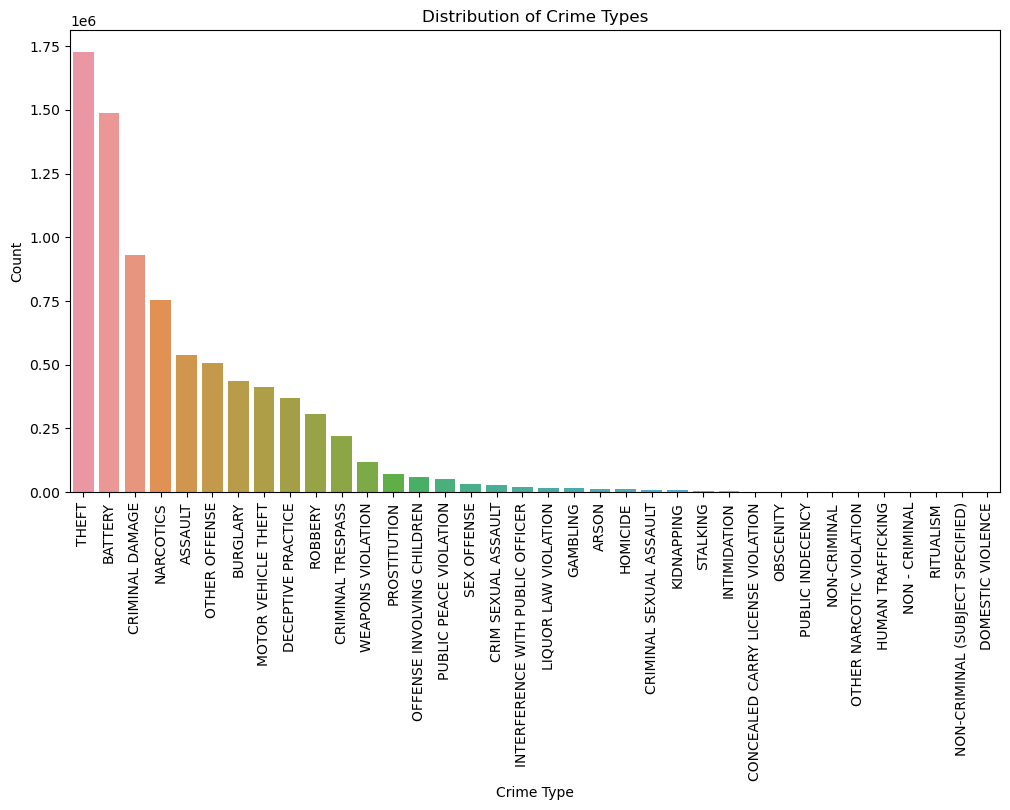

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary Type', order=df['Primary Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

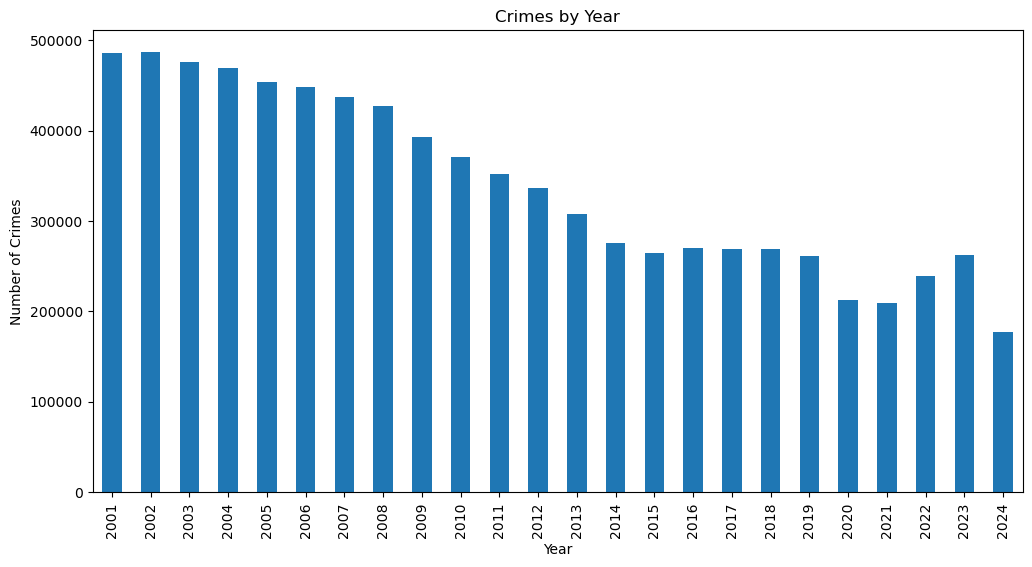

In [12]:
# Crime counts 
plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


In [13]:
df['Location Description'].value_counts()

Location Description
STREET                    2131743
RESIDENCE                 1350319
APARTMENT                  948541
SIDEWALK                   748621
OTHER                      269994
                           ...   
FUNERAL PARLOR                  1
JUNK YARD/GARBAGE DUMP          1
POLICE FACILITY                 1
CLEANERS/LAUNDROMAT             1
LAGOON                          1
Name: count, Length: 219, dtype: int64

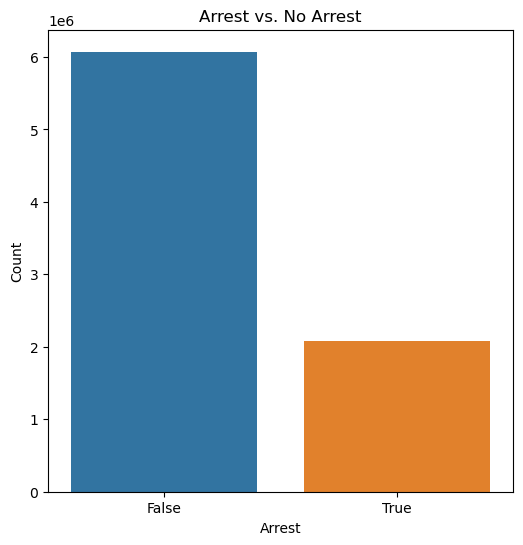

In [14]:
# Arrest vs. no arrest 
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Arrest')
plt.title('Arrest vs. No Arrest')
plt.xlabel('Arrest')
plt.ylabel('Count')
plt.show()


#### Feature Engineering

In [15]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d', errors='coerce') 
df['Updated On'] = pd.to_datetime(df['Updated On'],format='%Y-%m-%d', errors='coerce')  

print(df.dtypes)
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour


ID                               int64
Case Number                     object
Date                    datetime64[ns]
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
FBI Code                        object
Year                             int64
Updated On              datetime64[ns]
Location                        object
dtype: object
